In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../GlacierLakeDetectionICESat2/GlacierLakeIS2ML/')

import shutil

from IS2ML_utils import *
from figscode import *

In [2]:
#### to re-compile all data from the sources
# compile_IS2_comparison_data()

In [30]:
fn_data = 'data/is2comp/comparison_melling_fricker.csv'
df_data = pd.read_csv(fn_data)

datadir = 'data/is2comp/h5/'
list_h5 = [datadir+f for f in os.listdir(datadir) if os.path.isfile(os.path.join(datadir, f)) & ('.h5' in f)]
list_h5.sort()
list_h5 = [x for x in list_h5 if 'lake_greenland_melling_' in x] + [x for x in list_h5 if 'lake_amery_fricker_' in x]
list_ids = [x.split('/')[-1].replace('.h5', '') for x in list_h5]
dffiles = pd.DataFrame({'id': list_ids, 'h5': list_h5})
dffiles['tiff'] = dffiles.id.apply(lambda x: 'data/is2comp/imagery/%s_ensemble_depth_estimates.tiff' % x)
dffiles

,id,h5,tiff
0,lake_greenland_melling_1,data/is2comp/h5/lake_greenland_melling_1.h5,data/is2comp/imagery/lake_greenland_melling_1_...
1,lake_greenland_melling_2,data/is2comp/h5/lake_greenland_melling_2.h5,data/is2comp/imagery/lake_greenland_melling_2_...
2,lake_greenland_melling_3,data/is2comp/h5/lake_greenland_melling_3.h5,data/is2comp/imagery/lake_greenland_melling_3_...
3,lake_greenland_melling_4,data/is2comp/h5/lake_greenland_melling_4.h5,data/is2comp/imagery/lake_greenland_melling_4_...
4,lake_greenland_melling_5,data/is2comp/h5/lake_greenland_melling_5.h5,data/is2comp/imagery/lake_greenland_melling_5_...
5,lake_amery_fricker_1,data/is2comp/h5/lake_amery_fricker_1.h5,data/is2comp/imagery/lake_amery_fricker_1_ense...
6,lake_amery_fricker_2,data/is2comp/h5/lake_amery_fricker_2.h5,data/is2comp/imagery/lake_amery_fricker_2_ense...
7,lake_amery_fricker_3,data/is2comp/h5/lake_amery_fricker_3.h5,data/is2comp/imagery/lake_amery_fricker_3_ense...
8,lake_amery_fricker_4,data/is2comp/h5/lake_amery_fricker_4.h5,data/is2comp/imagery/lake_amery_fricker_4_ense...


In [31]:
df_data

,id_lake,lon,lat,dist_along_track_m,manual,predicted_depth,surrf_2024,surrf_corr,surrf_corr_conf,RTE_Landsat8_red_pan,...,Green_z_lit,Red_z_lit,STD_high,STD_low,Z_green,Z_green_max_stdev_mean,Z_green_min_stdev_mean,Z_red,Z_red_max_stdev_mean,Z_red_min_stdev_mean
0,lake_greenland_melling_1,-49.138228,67.080167,1306.5,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lake_greenland_melling_1,-49.138216,67.080212,1301.5,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,lake_greenland_melling_1,-49.138203,67.080256,1296.5,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lake_greenland_melling_1,-49.138190,67.080301,1291.5,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lake_greenland_melling_1,-49.138177,67.080345,1286.5,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,lake_amery_fricker_4,67.856341,-71.647915,1358.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2558,lake_amery_fricker_4,67.856323,-71.647959,1363.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2559,lake_amery_fricker_4,67.856305,-71.648004,1368.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,lake_amery_fricker_4,67.856287,-71.648048,1373.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def get_xylims_aspect(ax, img, fig):
    axbbx = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    axis_aspect = axbbx.height / axbbx.width
    img_wid = img.bounds.right - img.bounds.left
    img_centerx = (img.bounds.right + img.bounds.left) / 2
    img_centery = (img.bounds.top + img.bounds.bottom) / 2
    img_hgt = img.bounds.top - img.bounds.bottom
    img_aspect = img_hgt / img_wid
    
    if axis_aspect > img_aspect:
        yl = (img.bounds.bottom, img.bounds.top)
        xl = (img_centerx - img_hgt/axis_aspect/2, img_centerx + img_hgt/axis_aspect/2)
    else:
        xl = (img.bounds.left, img.bounds.right)
        yl = (img_centery - img_wid*axis_aspect/2, img_centery + img_wid*axis_aspect/2)
    return xl, yl

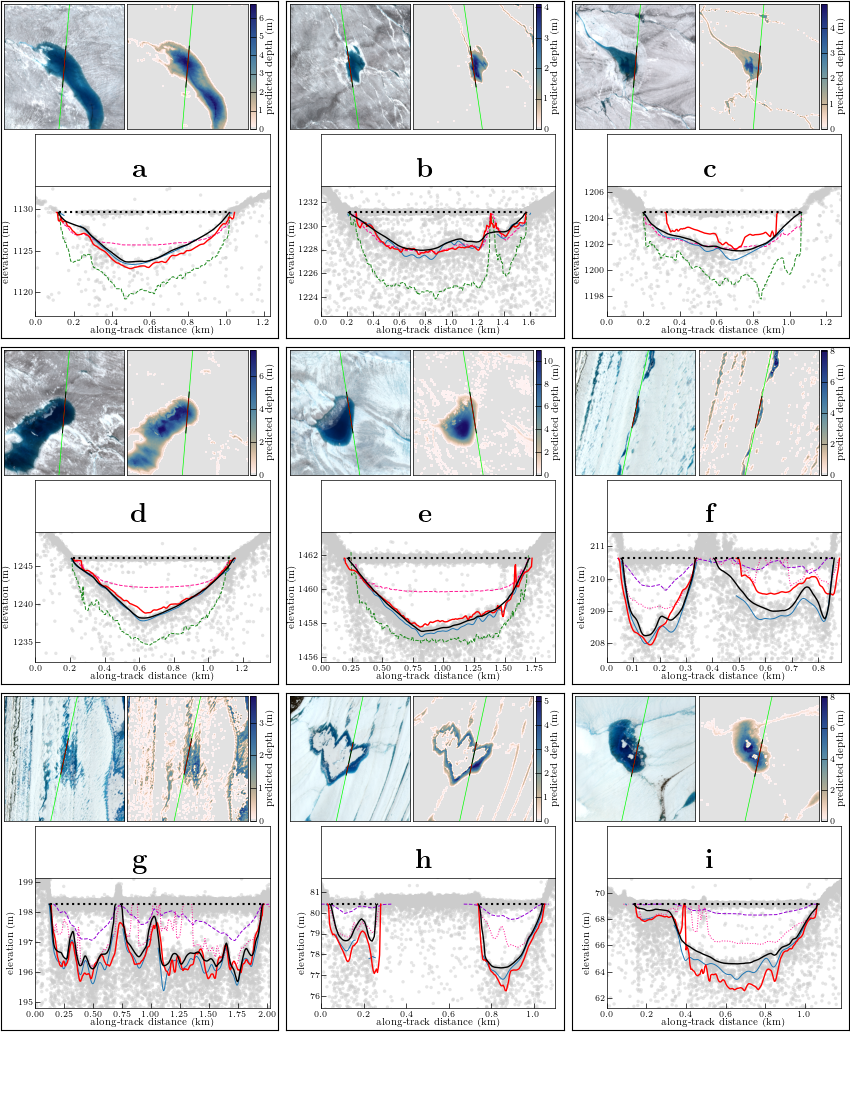

In [40]:
plt.close('all')

plt.rcParams.update({
    'font.size': 6,
    'text.usetex': True,
    'font.family': 'Optima',
    'text.latex.preamble': r"\usepackage{amsmath}"
})
labelsize = 7

figwid = 8.5
fighgt = 10
fig = plt.figure(figsize=[8.5,11])
nh = 5
gs = fig.add_gridspec(ncols=3, nrows=3*nh+1)
axbxs = []
for i in range(9):
    axbxs.append(fig.add_subplot(gs[nh*int(i/3):nh*int(i/3)+nh, i%3]))
    axbxs[-1].tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    axbxs[-1].patch.set_facecolor('none')
    for spine in axbxs[-1].spines.values():
        spine.set_zorder(100)
        
axleg = fig.add_subplot(gs[nh*3, :])
axleg.axis('off')
fig.tight_layout(pad=0.1, h_pad=1, w_pad=1)

def ith_letter(i):
        return chr(97 + i)
    
for iax, ax in enumerate(axbxs):
    ax.text(0.5, 0.5, '\\textbf{%s}' % ith_letter(iax), fontsize=20, transform=ax.transAxes, ha='center', va='center', zorder=101)
    
htop = 0.38
hbot = 0.45
pad_l = 0.125
pad_r = 0.03
pad_b = 0.065
pad_top = 0.01
pad_mid = pad_top * fighgt / figwid
pad_cbar = 0.01
pad_cbarlabel = 0.08
wid_cbar = 0.02
pad_vert = 0.015

plot_melling = ['manual', 'predicted_depth', 'surrf_2024', 'Green_z_lit', 'Red_z_lit']
plot_fricker = ['manual', 'predicted_depth', 'surrf_2024', 'RTE_Landsat8_red_pan', 'RTE_Sentinel2_red']
depth_keys = list(set(plot_melling + plot_fricker))

ref_idx = 1.336

cmap_img = cmc.lapaz_r

axs = []
for axbx in axbxs:
    axs_ = []
    wid_top = (1 - 2*pad_mid - pad_cbar - wid_cbar - pad_cbarlabel)/2
    axs_.append(axbx.inset_axes([pad_mid, 1-htop, wid_top, htop-pad_top])) # TCI full
    axs_.append(axbx.inset_axes([pad_mid*2+wid_top, 1-htop, wid_top, htop-pad_top], sharex=axs_[-1], sharey=axs_[-1])) # depth est full
    axs_.append(axbx.inset_axes([pad_mid*2+wid_top*2+pad_cbar, 1-htop, wid_cbar, htop-pad_top])) # colorbar 
    h_mid = 1 - (htop + hbot + pad_vert)
    axs_.append(axbx.inset_axes([pad_l, hbot, 1-(pad_l + pad_r), h_mid])) # along-track TCI
    axs_.append(axbx.inset_axes([pad_l, pad_b, 1-(pad_l + pad_r), hbot-pad_b], sharex=axs_[-1])) # along-track data
    for axx in axs_[:4]:
        axx.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
        for spine in axx.spines.values():
            spine.set_zorder(100)
    axs.append(axs_)

# for ilk, axset in enumerate([axs[i] for i in [0, 5]]):
for ilk, axset in enumerate(axs):
    
    files = dffiles.loc[ilk]
    id = files.id

    source = id.split('_')[2]
    source_txt = 'Fricker et al., 2021' if source=='fricker' else 'Melling et al., 2024'
    location = 'Antarctic' if source=='fricker' else 'Greenland'

    # photon data and lake elevation / info
    lk = dictobj(read_melt_lake_h5(files.h5))
    df_phot = lk.photon_data.copy()
    hsurf = lk.surface_elevation
    date_time = lk.date_time
    afterpulse = df_phot.prob_afterpulse > np.random.uniform(0,1,len(df_phot))
    df_phot = df_phot[~afterpulse].copy().reset_index(drop=True)
    df_phot.loc[df_phot.h < hsurf, 'h'] = hsurf - (hsurf - df_phot.loc[df_phot.h < hsurf, 'h']) / ref_idx
    
    thisdf = df_data[df_data.id_lake==id].copy().sort_values(by='dist_along_track_m').reset_index(drop=True)
    gdf = gpd.GeoDataFrame(thisdf, geometry=gpd.points_from_xy(thisdf.lon, thisdf.lat), crs="EPSG:4326")
    img = rio.open(files.tiff)
    gdf = gdf.to_crs(img.crs)
    gdf[['x', 'y']] = gdf.geometry.get_coordinates()
    xoff = np.nanmin(thisdf['dist_along_track_m'])
    df_phot.xatc -= xoff
    gdf.dist_along_track_m -= xoff
    gdf['xatc'] = gdf.dist_along_track_m / 1000
    manual_nodepth = gdf.manual <= 0
    max_depth = gdf[depth_keys].max().max()
    xl_track = (0.0, np.nanmax(gdf.xatc))
    yl_track = (hsurf - 1.2 * max_depth, hsurf + 0.3 * max_depth)
    
    ax = axset[0]
    xl_img, yl_img = get_xylims_aspect(ax, img, fig)
    rgb = img.read([4,3,2])
    rgbmin = np.percentile(rgb, 0.2)
    rgbmax = np.percentile(rgb, 97) - rgbmin
    rgb = np.clip((rgb-rgbmin) / rgbmax, 0, 1) * 255
    rgb = rgb.astype(np.uint8)
    rioplot.show(rgb, ax=ax, transform=img.transform)
    ax.set_xlim(xl_img)
    ax.set_ylim(yl_img)

    ax = axset[1]
    depth = img.read(1)
    depthmin = 0
    depthmax = np.percentile(depth, 99.9)
    rioplot.show(depth, ax=ax, transform=img.transform, vmin=0, vmax=depthmax, cmap=cmap_img)
    depth0 = depth
    depth0[depth0 > 0.1] = np.nan
    nan_val = 0.1
    depth0[~np.isnan(depth0)] = nan_val
    rioplot.show(depth0, ax=ax, transform=img.transform, cmap=cmc.grayC, vmin=0, vmax=1)
    cax = axset[2]
    sm = plt.cm.ScalarMappable(cmap=cmap_img, norm=plt.Normalize(vmin=0, vmax=depthmax))
    sm._A = []
    cbar = plt.colorbar(sm, cax=cax, orientation='vertical')
    cax.axhline(0, lw=3, color=cmc.grayC(nan_val))
    labpad = 1 if depthmax < 10 else -2
    cbar.set_label('predicted depth (m)', labelpad=labpad, fontsize=labelsize)
    cbar.ax.tick_params(axis='y', direction='in', length=4, width=0.5, pad=2)

    dx = gdf.x.iloc[-1] - gdf.x.iloc[0]
    dy = gdf.y.iloc[-1] - gdf.y.iloc[0]
    gt_x = [gdf.x.iloc[0] + ix * dx for ix in range(-5, 5)]
    gt_y = [gdf.y.iloc[0] + iy * dy for iy in range(-5, 5)]
    xnan = gdf.x.copy()
    xnan[manual_nodepth] = np.nan
    for ax in axset[:2]:
        ax.plot(gt_x, gt_y, color=(0,1,0), lw=0.5)
        ax.plot(gdf.x, gdf.y, color='k', lw=0.7)
        ax.plot(xnan, gdf.y, color='r', lw=0.4)

    ax = axset[4]
    # remove all zeros except at the edge
    keys_fillna = list(set(depth_keys) - set(['surrf_2024', 'surrf_corr']))
    gdf[keys_fillna] = gdf[keys_fillna].fillna(0.0)
    for k in keys_fillna:
        to_remove = gdf[k].rolling(window=3, center=True, min_periods=1).mean() <= 0
        gdf.loc[to_remove, k] = np.nan
    gdf.loc[gdf.surrf_2024==0, 'surrf_2024'] = np.nan
    gdf.loc[gdf.surrf_corr==0, 'surrf_corr'] = np.nan
    ax.scatter(df_phot.xatc/1000, df_phot.h, s=6, color=[0.8]*3, alpha=0.5, edgecolors='none')
    lk_surf = gdf.xatc * 0 + hsurf
    lk_surf[manual_nodepth] = np.nan
    p_photons = ax.scatter([-999]*4, [-999]*4, s=4, color='gray', label='ATL03 photons')
    p_lksurf = ax.plot(gdf.xatc, lk_surf, color='k', ls=':', lw=1.5, zorder=11, label='lake surface')
    p_manual, = ax.plot(gdf.xatc, hsurf-gdf.manual, color='k', label='manual depth', lw=1, zorder=10)
    p_predict, = ax.plot(gdf.xatc, hsurf-gdf.predicted_depth, color='r', label='predicted depth', lw=1, zorder=9)
    p_surrf, = ax.plot(gdf.xatc, hsurf-gdf.surrf_2024, color='C0', label='SuRRF', lw=0.7, zorder=8)
    
    if source == 'fricker':
        # p_watta, = ax.plot(gdf.xatc, hsurf-gdf.watta, color='c', ls='--', label='Watta', lw=0.7)
        p_l8, = ax.plot(gdf.xatc, hsurf-gdf.RTE_Landsat8_red_pan, color='darkviolet', ls='--', label='RTE: Landsat 8 red/pan bands', lw=0.7)
        p_s2, = ax.plot(gdf.xatc, hsurf-gdf.RTE_Sentinel2_red, color='deeppink', ls=':', label='RTE: Sentinel-2 red band', lw=0.7)

    if source == 'melling':
        # p_red, = ax.plot(gdf.xatc, hsurf-gdf.Z_red, color='deeppink', ls='--', label='RTE: Sentinel-2 red band', lw=0.7)
        # p_green, = ax.plot(gdf.xatc, hsurf-gdf.Z_green, color='forestgreen', ls='--', label='RTE: Sentinel-2 green band', lw=0.7)
        # p_dem, = ax.plot(gdf.xatc, hsurf-gdf.DEM_zeroed, color='y', ls='--', label='ArcticDEM', lw=0.7, zorder=9)
        p_red_lit, = ax.plot(gdf.xatc, hsurf-gdf.Red_z_lit, color='deeppink', ls='--', label='RTE: Sentinel-2 red band', lw=0.7)
        p_green_lit, = ax.plot(gdf.xatc, hsurf-gdf.Green_z_lit, color='forestgreen', ls='--', label='RTE: Sentinel-2 green band', lw=0.7)
    
    ax.set_xlim(xl_track)
    ax.set_ylim(yl_track)
    ylabs = [x for x in ax.get_yticks() if x % 1 == 0]
    ax.set_yticks(ylabs)
    ax.set_ylim(yl_track)
    ax.tick_params(axis='y', direction='in', pad=1, width=0.5)
    ax.tick_params(axis='x', direction='in', pad=2, width=0.5)
    ax.set_xlabel('along-track distance (km)', labelpad=0, fontsize=labelsize)
    ax.set_ylabel('elevation (m)', labelpad=2, fontsize=labelsize)

    # axis appearance
    for iax, ax in enumerate(axset):
        if iax != 4:
            ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
        for spine in ax.spines.values():
            spine.set_zorder(100)
            spine.set_linewidth(0.5)


In [23]:
id.split('_')[2]

'melling'

In [26]:
gdf

,id_lake,lon,lat,dist_along_track_m,manual,predicted_depth,surrf_2024,surrf_corr,surrf_corr_conf,RTE_Landsat8_red_pan,...,Z_green,Z_green_max_stdev_mean,Z_green_min_stdev_mean,Z_red,Z_red_max_stdev_mean,Z_red_min_stdev_mean,geometry,x,y,xatc
0,lake_greenland_melling_2,-48.996306,67.235108,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586509.128 7458984.634),586509.127991,7.458985e+06,0.000
1,lake_greenland_melling_2,-48.996320,67.235152,5.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586508.348 7458989.572),586508.348349,7.458990e+06,0.005
2,lake_greenland_melling_2,-48.996335,67.235197,10.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586507.569 7458994.509),586507.568554,7.458995e+06,0.010
3,lake_greenland_melling_2,-48.996349,67.235241,15.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586506.789 7458999.447),586506.789010,7.458999e+06,0.015
4,lake_greenland_melling_2,-48.996364,67.235286,20.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586506.010 7459004.384),586506.009533,7.459004e+06,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,lake_greenland_melling_2,-49.001032,67.250918,1775.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586248.441 7460739.834),586248.441135,7.460740e+06,1.775
356,lake_greenland_melling_2,-49.001045,67.250962,1780.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586247.732 7460744.782),586247.731783,7.460745e+06,1.780
357,lake_greenland_melling_2,-49.001058,67.251007,1785.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586247.016 7460749.729),586247.016298,7.460750e+06,1.785
358,lake_greenland_melling_2,-49.001071,67.251051,1790.0,NaN,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (586246.298 7460754.676),586246.297517,7.460755e+06,1.790


In [ ]:
['manual', 'predicted_depth', 'surrf_2024', 'RTE_Landsat8_red_pan', 'RTE_Sentinel2_red', 'Green_z_lit', 'Red_z_lit']
print(list(gdf))

In [ ]:
axset = axs[1]
ax = axset[0]


xl_img, yl_img = get_xylims_aspect(ax, img, fig)
print(xl_img, yl_img)
print((yl_img[1]-yl_img[0]) / (xl_img[1]-xl_img[0]))

In [ ]:
img.bounds

In [ ]:
include_lit_melling = True

plt.close('all')

# input data
df_melling = pd.read_csv('data/is2comp/data_melling_2024_surrfcorrected.csv',index_col=False)
df_fricker = pd.read_csv('data/is2comp/data_fricker_2021_surrfcorrected.csv',index_col=False)

conf = 0.2
df_fricker.loc[df_fricker.surrf_corr==0, 'surrf_corr'] = np.nan
df_fricker.loc[df_fricker.surrf_corr_conf<conf, 'surrf_corr'] = np.nan
df_melling.loc[df_melling.surrf_corr==0, 'surrf_corr'] = np.nan
df_melling.loc[df_melling.surrf_corr_conf<conf, 'surrf_corr'] = np.nan

# some plotting settings
plotname = 'figures/comparison_manualIS2_GrIS_AIS.jpg'
if include_lit_melling:
    plotname = plotname.replace('.jpg', '_allvalues.jpg')

plt.rcParams.update({
    'font.size': 7,
    'text.usetex': True,
    'font.family': 'Optima',
    'text.latex.preamble': r"\usepackage{amsmath}"
})

fig = plt.figure(figsize=[9,7])
gs = fig.add_gridspec(ncols=3, nrows=11)
axs = []
for i in range(9):
    axs.append(fig.add_subplot(gs[3*int(i/3):3*int(i/3)+3, i%3]))
for i in range(3):
    axs.append(fig.add_subplot(gs[9:, i]))

ref_idx = 1.336
# loop though all the lakes
for iplot, ilake in enumerate(np.hstack((np.arange(1,6), np.arange(1,5)))):
    
    ax = axs[iplot]
    source = 'melling' if iplot < 5 else 'fricker'
    source_txt = 'Fricker et al., 2021' if source=='fricker' else 'Melling et al., 2024'
    dfm = df_fricker if source=='fricker' else df_melling
    lake_file_name = 'data/is2comp/lake_amery_fricker_%i.h5' % ilake if source=='fricker' else 'data/is2comp/lake_greenland_melling_%i.h5' % ilake
    location = 'Antarctic' if source=='fricker' else 'Greenland'
    
    selector = dfm.lake_id == ilake
    dfi = dfm[selector].copy()
    lk = dictobj(read_melt_lake_h5(lake_file_name))
    hsurf = lk.surface_elevation
    df = lk.photon_data
    man_bed = hsurf - dfi.manual
    man_bed[dfi.manual == 0] = np.nan
    
    afterpulse = df.prob_afterpulse > np.random.uniform(0,1,len(df))
    xmin = dfi.dist_along_track_m[(dfi.manual>0) & ~np.isnan(dfi.manual)].min()
    xmax = dfi.dist_along_track_m[(dfi.manual>0) & ~np.isnan(dfi.manual)].max()
    xrange = xmax-xmin
    fac = 0.11
    xlim = np.array([xmin-fac*xrange, xmax+fac*xrange])
    df = df[(df.xatc > xlim[0]) & (df.xatc < xlim[1])].copy()
    df.loc[df.h < hsurf, 'h'] = hsurf - (hsurf - df.loc[df.h < hsurf, 'h']) / ref_idx
    xoff = df.xatc.min()
    df.xatc -= xoff
    dfi.dist_along_track_m -= xoff
    xlim -= xoff

    # remove zero depth values for plotting
    dfi.loc[(dfi.surrf_2024==0) | (dfi.manual==0), 'surrf_2024'] = np.nan
    dfi.loc[dfi.manual==0, 'manual'] = np.nan
    ax.scatter(df.xatc[~afterpulse], df.h[~afterpulse], s=6, color=[0.8]*3, alpha=0.35, edgecolors='none')
    p_photons = ax.scatter([-999]*4, [-999]*4, s=4, color='gray', label='ATL03 photons')
    p_manual, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.manual, color='k', label='manual', lw=1, zorder=10)
    p_surrf, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.surrf_2024, color='b', label='SuRRF', lw=1, zorder=11)
    p_surrf_corr, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.surrf_corr, color='C1', label='SuRRF scattering\ncorrection', lw=0.7, zorder=9)

    if source == 'fricker':
        dfi.loc[dfi.RTE_Landsat8_red_pan==0, 'RTE_Landsat8_red_pan'] = np.nan
        dfi.loc[dfi.RTE_Sentinel2_red==0, 'RTE_Sentinel2_red'] = np.nan
        p_watta, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.watta, color='c', ls='--', label='Watta', lw=0.7)
        p_l8, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.RTE_Landsat8_red_pan, color='r', ls='--', label='RTE: Landsat 8 red/pan bands', lw=0.7)
        p_s2, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.RTE_Sentinel2_red, color='r', ls=':', label='RTE: Sentinel-2 red band', lw=0.7)
        plotted_vals = dfi[['manual', 'surrf_2024', 'watta', 'RTE_Landsat8_red_pan', 'RTE_Sentinel2_red']]

    if source == 'melling':
        p_red, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.Z_red, color='r', ls='--', label='RTE: Sentinel-2 red band', lw=0.7)
        p_green, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.Z_green, color='g', ls='--', label='RTE: Sentinel-2 green band', lw=0.7)
        p_dem, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.DEM_zeroed, color='y', ls='--', label='ArcticDEM', lw=0.7, zorder=9)
        plotted_vals = dfi[['manual', 'surrf_2024', 'Z_red', 'Z_green', 'DEM_zeroed']]
        if include_lit_melling:
            p_red_lit, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.Red_z_lit, color='r', ls=':', label='RTE: Sentinel-2 red band (lit)', lw=0.6)
            p_green_lit, = ax.plot(dfi.dist_along_track_m, hsurf-dfi.Green_z_lit, color='g', ls=':', label='RTE: Sentinel-2 green band (lit)', lw=0.6)
            plotted_vals = dfi[['manual', 'surrf_2024', 'Z_red', 'Z_green', 'DEM_zeroed', 'Red_z_lit', 'Green_z_lit']]
            # ax.fill_between(dfi.dist_along_track_m, hsurf - dfi.Z_green_max_stdev_mean, hsurf - dfi.Z_green_min_stdev_mean, color='g', alpha=0.1, zorder=0)
            # ax.fill_between(dfi.dist_along_track_m, hsurf - dfi.Z_red_max_stdev_mean, hsurf - dfi.Z_red_min_stdev_mean, color='r', alpha=0.1, zorder=0)
    
    surf = np.ones_like(dfi.manual)*hsurf
    surf[(dfi.manual==0) | np.isnan(dfi.manual)] = np.nan
    p_surface, = ax.plot(dfi.dist_along_track_m, surf, 'k:', label='lake surface')
    ax.set_xlim(xlim)
    ax.set_ylim([hsurf-1.15*plotted_vals.max().max(), hsurf+0.6*plotted_vals.max().max()])
    ax.ticklabel_format(useOffset=False, style='plain')
    if iplot%3==0:
        ax.set_ylabel('elevation above geoid (m)', fontsize=10)
    if int(iplot/3) == 2:
        ax.set_xlabel('along-track distance (m)', fontsize=10)

    ax.text(0.5, 0.98, '\\textbf{%s lake %s}\n(%s)'%(location,ilake,source_txt),transform=ax.transAxes,ha='center',va='top', fontsize=9)
    ax.text(0.01, 0.99, r'\textbf{%s)}' % chr(ord('a') + iplot), transform=ax.transAxes, ha='left', va='top', fontsize=12)

# legends
empty_ = ax.scatter([],[],s=1,alpha=0,label=' ')

hdls = [[p_photons, p_surface, p_manual, p_surrf, p_surrf_corr], [p_watta, p_l8, p_s2], [p_red, p_green, p_dem]]
tits = [r'\textbf{all panels}', r'\textbf{Antarctic lakes (Fricker et al., 2021)}', r'\textbf{Greenland lakes (Melling et al., 2024)}']
for i in range(3):
    ax = axs[9+i]
    ax.axis('off')
    ncols = 2 if i==0 else 1
    if i==2 and include_lit_melling:
        pr = Line2D([],[], color='r', ls='--', lw=0.7)
        prl = Line2D([],[], color='r', ls=':', lw=0.7)
        pg = Line2D([],[], color='g', ls='--', lw=0.7)
        pgl = Line2D([],[], color='g', ls=':', lw=0.7)
        hdl_mell = [(pr, prl), (pg, pgl), p_dem]
        labels_melling = ['RTE: Sentinel-2 red (dotted: lit.)', 'RTE: Sentinel-2 green (dotted: lit.)', 'ArcticDEM']
        leg = ax.legend(handles=hdl_mell, labels=labels_melling, loc='center', fontsize=8,
                        handler_map={tuple:HandlerLinesVertical()}, handleheight=1, title=tits[i], title_fontproperties={'size': 8})
    else:
        leg = ax.legend(handles=hdls[i], ncols=ncols, loc='center', scatterpoints=4, fontsize=8, title=tits[i], title_fontproperties={'size': 8})
    leg._legend_box.align = "left"
    ax.add_artist(leg)

fig.tight_layout(pad=0.5)
for ax in axs:
    ylabs = [x for x in ax.get_yticks() if x % 1 == 0]
    ax.set_yticks(ylabs)
fig.tight_layout(pad=0.5)

# save the figure and show plot
# plt.close(fig)
# fig.savefig(plotname, dpi=600)
# display(Image(plotname))
# display(fig)

In [ ]:
# re load the files to make sure the plotting didn't meddle with the dataframes 
# (some weird stuff was happening with missing values that I had removed...)
df_melling = pd.read_csv('data/is2comp/data_melling_2024_surrfcorrected.csv',index_col=False)
df_fricker = pd.read_csv('data/is2comp/data_fricker_2021_surrfcorrected.csv',index_col=False)

print('Antarctic lakes:')
dfsel = df_fricker
stats = ['surrf_2024', 'surrf_corr', 'watta', 'RTE_Sentinel2_red', 'RTE_Landsat8_red_pan']
dfs = []
for stat in stats:
    dfs.append(getstats_comparison(dfsel, stat))
display(pd.concat(dfs))

print('Greenland lakes:')
dfsel = df_melling
stats = ['surrf_2024', 'surrf_corr', 'Z_red', 'Red_z_lit', 'Z_green', 'Green_z_lit', 'DEM_zeroed']
dfs = []
for stat in stats:
    dfs.append(getstats_comparison(dfsel, stat))
display(pd.concat(dfs))

cols = ['manual', 'surrf_2024', 'surrf_corr']
dfsel = pd.concat((df_fricker[cols], df_melling[cols]))
print('All lakes:')
display(pd.concat((getstats_comparison(dfsel, 'surrf_2024'), getstats_comparison(dfsel, 'surrf_corr'))))